## Random Forest Regression

**This dataset is from UCI dataset and is called Combined_Cycle_Power_Plant**


**We want to predict Net hourly electrical energy output**

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt#
import seaborn as sns

### Load and read the dataset

In [2]:
df = pd.read_excel("Folds5x2_pp.xlsx")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.sample(10)

,AT,V,AP,RH,PE
8187,18.26,61.27,1019.10,74.74,428.67
278,20.97,61.87,1011.45,65.41,446.76
6593,24.80,68.30,1018.01,80.41,436.17
4471,30.09,69.48,1009.51,53.24,435.20
3455,14.65,35.40,1016.16,60.26,469.61
2094,12.25,44.85,1014.13,85.25,470.92
2921,9.73,38.56,1017.18,61.81,479.78
823,6.03,41.14,1028.04,87.46,479.61
8202,31.09,64.05,1011.32,61.14,440.62
237,7.55,39.22,1014.53,77.76,482.19


In [3]:
df.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [4]:
df.tail(10)

,AT,V,AP,RH,PE
9558,22.97,62.40,1010.25,75.18,445.30
9559,26.22,49.82,1015.48,55.80,454.20
9560,23.27,68.28,1005.01,74.83,444.86
9561,11.76,41.58,1020.91,88.35,465.45
9562,14.02,40.10,1015.56,82.44,467.32
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [5]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [6]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


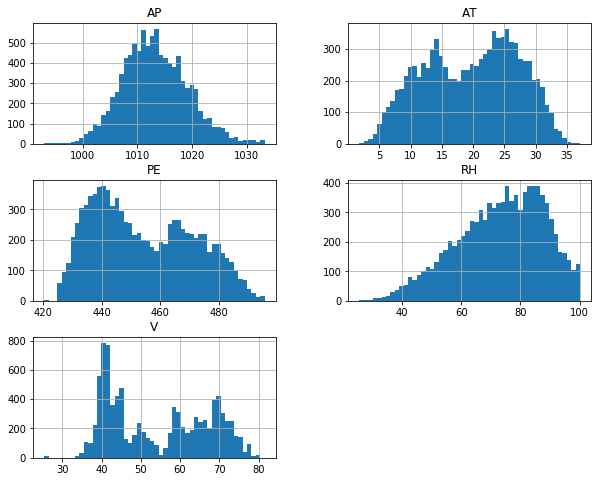

In [7]:
df.hist(bins = 50, figsize = (10, 8))
plt.show()

### The full meaning  of the columns are as follow:

**AT = Ambient Temperature**

**Ap = Ambient Pressure**

**RH = Relative Humidity**

**V = Exhaust Vacuum**

**PE = Electrical Energy**

### Basic insight into the dataset

In [8]:
df.shape

(9568, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
df.dtypes

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object

In [11]:
df.columns.values

array(['AT', 'V', 'AP', 'RH', 'PE'], dtype=object)

In [12]:
df.index.values

array([   0,    1,    2, ..., 9565, 9566, 9567], dtype=int64)

## Handling Missing_data

In [13]:
missing_data = df.isnull()
missing_data

,AT,V,AP,RH,PE
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
9563,False,False,False,False,False
9564,False,False,False,False,False
9565,False,False,False,False,False
9566,False,False,False,False,False


### Check each missing data per column

In [14]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")
    

AT
False    9568
Name: AT, dtype: int64

V
False    9568
Name: V, dtype: int64

AP
False    9568
Name: AP, dtype: int64

RH
False    9568
Name: RH, dtype: int64

PE
False    9568
Name: PE, dtype: int64



In [15]:
missing_value_count = df.isnull().sum()
missing_value_count

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

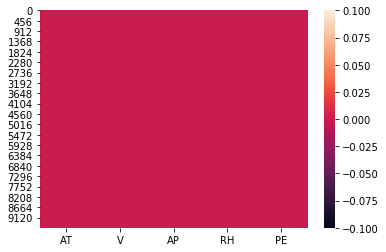

In [16]:
sns.heatmap(df.isnull())

### Descriptive Statistic

In [17]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76


In [19]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [20]:
df.corr

<bound method DataFrame.corr of          AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]>

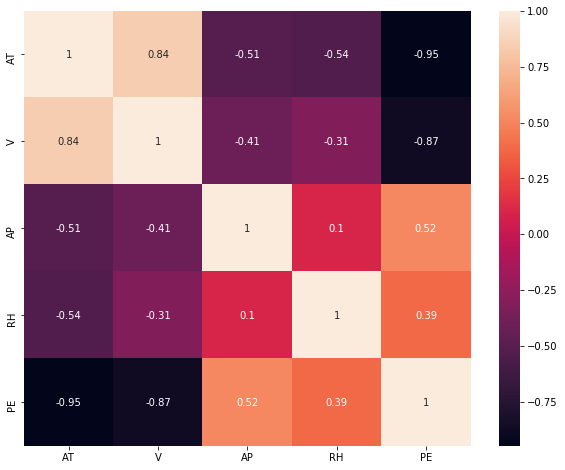

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Continous Numerical Variable

## We want to see if AT, V, AP, RH are prediction of PE

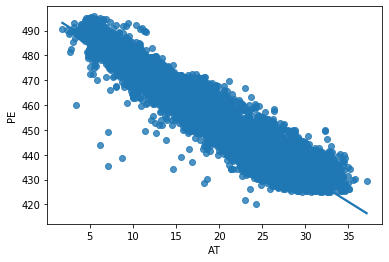

In [22]:
sns.regplot(x = "AT", y = "PE", data = df)

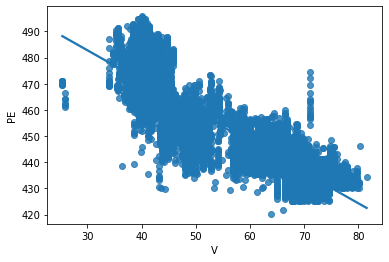

In [23]:
sns.regplot(x = "V", y = "PE", data = df)

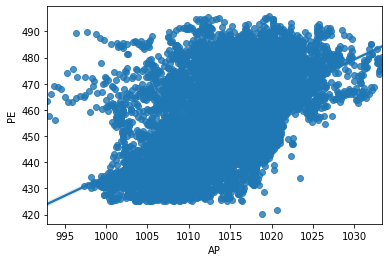

In [24]:
sns.regplot(x = "AP", y ="PE", data = df)

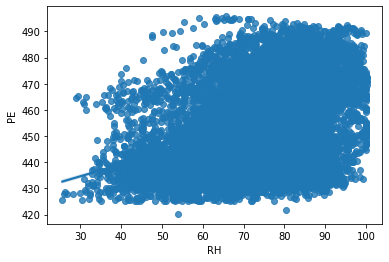

In [25]:
sns.regplot(x = "RH", y = "PE", data = df)

## Split the  into Training set and Test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Train the Random Forest Regression on the Training set

In [27]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### Predict the Test Results

In [28]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.42 431.23]
 [458.09 460.01]
 [463.08 461.14]
 ...
 [470.18 468.9 ]
 [475.16 473.9 ]
 [439.69 437.07]]


## Evaluate the Model Performance

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9609785050294755